In [1]:
import pandas as pd
import numpy as np
import re
from pprint import pprint

import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

BGEIDSC.EF2EFFP
DB2 table from Fuel Optimzation vendor
select * from BGEIDSC.EF2EFFP
1.	TRUCK		Unit Number
2.	ACTIVE		Active Flag (for fuel optimization)
3.	SENDFUEL	Send Fuel Flag (for fuel optimization)
4.	SENDROUTE	Send Route Flag (for fuel optimization)
5.	TANKCAP	Tank Capacity (gallons)
6.	AVGMPG	MPG used for Fuel optimization (real value is closer to 7mpg)


In [2]:
df_fuelop = pd.read_csv("data/BGEIDSC.EF2EFFP.csv")
df_fuelop.head(5)

,TRUCK,ACTIVE,SENDFUEL,SENDROUTE,TANKCAP,AVGMPG,SATTYPE
0,1,Y,Y,Y,200,6.0,
1,243,Y,Y,Y,200,6.0,
2,244,Y,Y,Y,200,6.0,
3,245,Y,Y,Y,200,6.0,
4,246,Y,Y,Y,200,6.0,


In [3]:
df_fuelop.shape

(836, 7)

In [4]:
df_fuelop['ACTIVE'].unique()
len(df_fuelop['ACTIVE'].unique())

1

In [5]:
df_fuelop['TRUCK'].unique()
len(df_fuelop['TRUCK'].unique())

836

In [6]:
df_fuelop['TANKCAP'].unique()
#len(df_fuelop['TANKCAP'].unique())

array([200, 230, 250, 235, 120])

In [7]:
df_fuelop['SATTYPE'].unique()
#len(df_fuelop['SATTYPE'].unique())

array([' '], dtype=object)

In [8]:
df_fuelop['SENDROUTE'].unique()
#len(df_fuelop['SENDROUTE'].unique())

array(['Y'], dtype=object)

In [9]:
df_2003 = df_fuelop[df_fuelop.TRUCK == 2003]
df_2003.head(5)

,TRUCK,ACTIVE,SENDFUEL,SENDROUTE,TANKCAP,AVGMPG,SATTYPE
661,2003,Y,Y,Y,200,6.0,


BGETCHDATA.PTCHTRANH
DB2 table, from AS400 – fuel vendor software
select TRNID, TRNDAT, TRNTIM, TRNTS#, TRNTSN, TRNSTC, TRNST, TRNDRI, TRNUNT, TRNPI1, TRNPQ1, TRNPI2, TRNPQ2, TRNPI3, TRNPQ3, TRNPI4, TRNPQ4, TRNPI5, TRNPQ5, TRNPI6, TRNPQ6 from BGETCHDATA.PTCHTRANH where TRNDAT > 20170000

1.	TRNID		Transaction ID 
2.	TRNDAT	Transaction Date (YYYYMMDD)
3.	TRNTIM		Transaction Time (HHMM)
4.	TRNTS#		Station ID
5.	TRNTSN		Station Name
6.	TRNSTC		Station City
7.	TRNST		Station State
8.	TRNDRI		Driver Code
9.	TRNUNT	Unit ID
10.	TRNPI1		Item Code 1
11.	TRNPQ1	Item Quantity 1
12.	TRNPI2		Item Code 2
13.	TRNPQ2	Item Quantity 2
14.	TRNPI3		Item Code 3
15.	TRNPQ3	Item Quantity 3
16.	TRNPI4		Item Code 4
17.	TRNPQ4	Item Quantity 4
18.	TRNPI5		Item Code 5
19.	TRNPQ5	Item Quantity 5
20.	TRNPI6		Item Code 6
21.	TRNPQ6	Item Quantity 6

Actual fuel transactions will have an item code of ULSD or FUEL, CDSL, DSL1, BDSL, and could be in any of the Item slots 1-6


In [10]:
df_fueltrans = pd.read_csv("data/BGETCHDATA.PTCHTRANH.csv")
df_fueltrans.head(5)

,TRNID,TRNDAT,TRNTIM,TRNTS#,TRNTSN,TRNSTC,TRNST,TRNDRI,TRNUNT,TRNPI1,...,TRNPI2,TRNPQ2,TRNPI3,TRNPQ3,TRNPI4,TRNPQ4,TRNPI5,TRNPQ5,TRNPI6,TRNPQ6
0,42574765,20170101,20,520277,FLYING J VANDALIA 97,VANDALIA,OH,ULAL,1564,SCLE,...,,0.00,,0.0,,0.0,,0.0,,0
1,42575331,20170101,48,516202,PILOT NEW BRAUNFELS 330,NEW BRAUNFELS,TX,MANRI,1584,ULSD,...,DEFD,7.71,CADV,1.0,,0.0,,0.0,,0
2,42578678,20170101,134,516277,PILOT 421,DALTON,GA,RUSR,1713,ULSD,...,DEFD,4.12,,0.0,,0.0,,0.0,,0
3,42578722,20170101,137,231100,FJ-BRUNSWICK 627,BRUNSWICK,GA,FOSJA,1711,ULSD,...,,0.00,,0.0,,0.0,,0.0,,0
4,42579695,20170101,302,523050,BIG G EXPRESS TERMINAL,GLADEVILLE,TN,HICWIL,1837,ULSD,...,,0.00,,0.0,,0.0,,0.0,,0


In [11]:
df_fueltrans.shape

(147861, 21)

In [12]:
df_fueltrans.count()

TRNID     147861
TRNDAT    147861
TRNTIM    147861
TRNTS#    147861
TRNTSN    147861
TRNSTC    147861
TRNST     147861
TRNDRI    147861
TRNUNT    147861
TRNPI1    147861
TRNPQ1    147861
TRNPI2    147861
TRNPQ2    147861
TRNPI3    147861
TRNPQ3    147861
TRNPI4    147861
TRNPQ4    147861
TRNPI5    147861
TRNPQ5    147861
TRNPI6    147861
TRNPQ6    147861
dtype: int64

In [13]:
df_fueltrans.describe()

,TRNID,TRNDAT,TRNTIM,TRNTS#,TRNPQ1,TRNPQ2,TRNPQ3,TRNPQ4,TRNPQ5,TRNPQ6
count,1.478610e+05,1.478610e+05,147861.000000,147861.000000,147861.000000,147861.000000,147861.000000,147861.000000,147861.000000,147861.0
mean,6.796422e+07,2.017244e+07,1173.225367,470724.317224,70.785330,2.047590,0.061714,0.001165,0.000020,0.0
std,2.023337e+07,3.736726e+03,506.602273,123079.764102,53.217786,3.533198,0.393092,0.035649,0.004504,0.0
min,3.250000e+02,2.017010e+07,0.000000,231001.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.0
25%,5.405748e+07,2.017042e+07,819.000000,516006.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,6.840586e+07,2.017081e+07,1200.000000,516265.000000,79.320000,0.000000,0.000000,0.000000,0.000000,0.0
75%,8.396866e+07,2.017120e+07,1535.000000,521524.000000,115.170000,3.540000,0.000000,0.000000,0.000000,0.0
max,9.999858e+07,2.018032e+07,2359.000000,773136.000000,250.120000,19.000000,16.080000,4.310000,1.000000,0.0


In [14]:
sum(pd.isnull(df_fueltrans['TRNPI2']))

0

In [15]:
df_fueltrans['TRNUNT'].unique() ##939 unique ID
len(df_fueltrans['TRNUNT'].unique())

655

In [16]:
df_fueltrans['TRNDRI'].unique() ##939 unique ID
len(df_fueltrans['TRNDRI'].unique())

939

In [17]:
TRNDRI_counts = Counter(df_fueltrans.TRNDRI)
TRNDRI_counts
TRNDRI_counts_dict = dict(TRNDRI_counts)
#pprint(TRNDRI_counts_dict)
TRNDRI_fueltrans_freq = pd.DataFrame.from_dict(TRNDRI_counts_dict, orient='index')
TRNDRI_fueltrans_freq.head(3)

,0
ULAL,436
MANRI,150
RUSR,95


In [18]:
TRNDRI_fueltrans_freq.head(3)

,0
ULAL,436
MANRI,150
RUSR,95


In [19]:
TRNDRI_fueltrans_freq.reset_index(drop=False, inplace=True)
TRNDRI_fueltrans_freq.head(5)

,index,0
0,ULAL,436
1,MANRI,150
2,RUSR,95
3,FOSJA,331
4,HICWIL,295


In [20]:
TRNDRI_fueltrans_freq.columns

Index(['index', 0], dtype='object')

In [21]:
TRNDRI_fueltrans_freq.rename(columns={0:'number_of_occurrences'}, inplace=True)

In [22]:
TRNDRI_fueltrans_freq.head()

,index,number_of_occurrences
0,ULAL,436
1,MANRI,150
2,RUSR,95
3,FOSJA,331
4,HICWIL,295


In [23]:
TRNDRI_fueltrans_freq.rename(columns={'index':'driver_ID', '0':'number_of_occurrences'}, inplace=True)

In [24]:
TRNDRI_fueltrans_freq.rename({"0": "number_of_occurrences"}, axis = 1, inplace =True)
TRNDRI_fueltrans_freq.head()

,driver_ID,number_of_occurrences
0,ULAL,436
1,MANRI,150
2,RUSR,95
3,FOSJA,331
4,HICWIL,295


In [25]:
#TRNDRI_counts = Counter(df_fueltrans.TRNDRI)
#TRNDRI_counts
#TRNDRI_counts_dict = dict(TRNDRI_counts)
#pprint(TRNDRI_counts_dict)
#TRNDRI_fueltrans_freq = pd.DataFrame.from_dict(TRNDRI_counts_dict, orient='index')
#TRNDRI_fueltrans_freq.head(3)
#TRNDRI_fueltrans_freq.reset_index(drop=False, inplace=True)
#TRNDRI_fueltrans_freq.head(5)
#TRNDRI_fueltrans_freq.columns
#TRNDRI_fueltrans_freq.rename(columns={0:'number_of_occurrences'}, inplace=True)
#TRNDRI_fueltrans_freq.rename({"0": "number_of_occurrences"}, axis = 1, inplace =True)
#TRNDRI_fueltrans_freq.head()

In [26]:
TRNUNT_counts = Counter(df_fueltrans.TRNUNT).most_common()
TRNUNT_counts

[('2003  ', 581),
 ('1847  ', 517),
 ('1873  ', 482),
 ('1957  ', 475),
 ('308   ', 468),
 ('1952  ', 454),
 ('1830  ', 448),
 ('1994  ', 445),
 ('1814  ', 436),
 ('1845  ', 424),
 ('1968  ', 424),
 ('1877  ', 421),
 ('1932  ', 418),
 ('1734  ', 416),
 ('1868  ', 412),
 ('1881  ', 410),
 ('1728  ', 408),
 ('1926  ', 406),
 ('1925  ', 396),
 ('2001  ', 394),
 ('2053  ', 392),
 ('1936  ', 388),
 ('1755  ', 387),
 ('1750  ', 387),
 ('1836  ', 384),
 ('1716  ', 383),
 ('1772  ', 379),
 ('1955  ', 374),
 ('2002  ', 373),
 ('1764  ', 373),
 ('1762  ', 373),
 ('1736  ', 370),
 ('1995  ', 370),
 ('1699  ', 370),
 ('1883  ', 369),
 ('1984  ', 369),
 ('1686  ', 369),
 ('1951  ', 369),
 ('1793  ', 368),
 ('1913  ', 368),
 ('1853  ', 367),
 ('1939  ', 366),
 ('1758  ', 366),
 ('1810  ', 365),
 ('1860  ', 364),
 ('2020  ', 364),
 ('1985  ', 362),
 ('1732  ', 361),
 ('1824  ', 361),
 ('1792  ', 359),
 ('1941  ', 358),
 ('1816  ', 357),
 ('1730  ', 356),
 ('1921  ', 355),
 ('1915  ', 355),
 ('1722  '

Extranet2.ExactFuelEvent
SQL Server table, imported from Omnitracs Event Subscriber
Select * from ExactFuelEvents where EventTimeStamp >= '2017-01-01 00:00:00'
1.	Id			AutoNumber ID
2.	ESS_Id			Omnitracs Event Subscriber Service Event Id
3.	EventTimeStamp	DateTime of Event (normalized to Central Time)
4.	EquipmentID		Unit Number
5.	MCTNumber		Mobile Communications Terminal ID
6.	EquipmentType		should always read ‘tractor’
7.	DriverId			Driver Code Assigned to unit at time of reading (varchar(6))
8.	Latitude		decimal degrees latitude at time of reading
9.	Longitude		decimal degrees longitude at time of reading
10.	LocationTimeStamp 	DateTime of location reading
11.	Speed			MPH at time of reading
12.	Heading		direction of travel at time of reading
13.	Odometer		unit odometer at time of reading
14.	IgnitionStatus		1=on, 2=off
15.	EFReportReason	0=ignition on, 1=ignition off, 2=timer


In [27]:
df_fuelevents = pd.read_csv("data/Extranet2.ExactFuelEvents.csv")
df_fuelevents.head(10)

,Id,ESS_Id,EventTimeStamp,EquipmentID,MCTNumber,EquipmentType,DriverID,Latitude,Longitude,LocationTimeStamp,Speed,Heading,Odometer,IgnitionStatus,EFReportReason
0,12649083,13640241,2017-01-01 00:00:32.387,1992,105369677,tractor,BATK,30.34642,-81.70724,2017-01-01 00:00:30.000,0,0.0,39895.5,2,1
1,12649084,13640242,2017-01-01 00:01:24.867,1712,105437938,tractor,TAYANT,36.93953,-84.09541,2017-01-01 00:01:27.000,0,0.0,360378.8,1,2
2,12649092,13640251,2017-01-01 00:04:15.053,1713,105438293,tractor,RUSR,35.58664,-84.52786,2017-01-01 00:04:17.000,67,219.5,377577.4,1,2
3,12649102,13640261,2017-01-01 00:04:10.260,1585,105301976,tractor,MCAD,35.15430,-90.14263,2017-01-01 00:04:10.000,0,0.0,513931.8,1,2
4,12649103,13640272,2017-01-01 00:10:13.187,1564,105351785,tractor,ULAL,39.90268,-84.19254,2017-01-01 00:10:11.000,3,91.0,498691.0,1,2
5,12649104,13640273,2017-01-01 00:11:08.123,1711,105321298,tractor,FOSJA,30.51558,-81.63283,2017-01-01 00:11:10.000,3,127.6,342948.0,1,2
6,12649105,13640274,2017-01-01 00:11:48.803,1693,105356123,tractor,THOCHA,36.18582,-86.26805,2017-01-01 00:11:50.000,0,333.2,340043.7,1,2
7,12649106,13640275,2017-01-01 00:12:26.077,1787,105455670,tractor,RODMAR,35.16910,-80.88830,2017-01-01 00:12:27.000,53,193.1,224306.6,1,2
8,12649107,13640276,2017-01-01 00:13:02.450,1992,105369677,tractor,BATK,30.34646,-81.70727,2017-01-01 00:13:00.000,0,0.0,39895.5,1,0
9,12649108,13640277,2017-01-01 00:13:38.137,1711,105321298,tractor,FOSJA,30.51642,-81.63271,2017-01-01 00:13:40.000,0,96.3,342948.1,2,1


In [28]:
df_fuelevents.shape

(8495130, 15)

In [29]:
len(df_fuelevents['Speed'].unique())

88

In [30]:
df_fuelevents['EquipmentID'].unique() ##774 unique ID
len(df_fuelevents['EquipmentID'].unique())
Counter(df_fuelevents['EquipmentID']).most_common()
#df_fuelevents['EquipmentID'].describe()

[(9996, 42369),
 (9998, 42352),
 (1918, 33901),
 (9997, 28420),
 (2003, 25750),
 (310, 24871),
 (1890, 24534),
 (1808, 24104),
 (245, 24056),
 (1957, 23644),
 (1865, 23300),
 (1666, 23082),
 (1879, 22840),
 (1995, 22801),
 (1715, 22278),
 (1843, 22239),
 (9994, 22201),
 (1941, 22141),
 (1792, 22072),
 (1814, 22059),
 (1847, 22054),
 (9995, 21989),
 (1994, 21910),
 (1721, 21135),
 (1732, 21054),
 (1772, 20997),
 (1684, 20975),
 (2023, 20824),
 (1972, 20776),
 (1938, 20542),
 (2014, 20394),
 (1934, 20280),
 (1729, 20216),
 (1848, 20032),
 (1704, 19917),
 (1824, 19903),
 (1734, 19899),
 (1645, 19854),
 (1967, 19755),
 (1809, 19672),
 (1786, 19577),
 (1656, 19528),
 (1858, 19470),
 (1674, 19332),
 (1694, 19297),
 (1942, 19267),
 (1991, 19264),
 (1639, 19213),
 (1877, 19173),
 (1930, 19152),
 (1799, 19152),
 (1726, 18999),
 (1669, 18981),
 (307, 18981),
 (1683, 18974),
 (1821, 18960),
 (2017, 18888),
 (1953, 18877),
 (1768, 18874),
 (1924, 18851),
 (1741, 18812),
 (1736, 18798),
 (1797, 187

In [31]:
df_fuelevents['DriverID'].unique() ##949 unique ID
len(df_fuelevents['DriverID'].unique())

949

Extranet2.ExactFuelTankLevel
SQL Server table, imported from Omnitracs Event Subscriber
select ExactFuelTankLevels.* from ExactFuelTankLevels join ExactFuelEvents on ExactFuelEvents.Id = ExactFuelEventId where EventTimeStamp >= '2017-01-01 00:00:00'

1.	Id			AutoNumber id
2.	TankId			Tank Sensor # (for our trucks, will always be 1)
3.	TankLevelPercent	Percentage Reading 0-100.00
4.	TankLevelGallons	Gallons (Percentage * Tank Capacity) (calculated)
5.	ExactFuelEventId	Foreign Key to ExactFuelEvent


In [32]:
df_fuellevel = pd.read_csv("data/Extranet2.ExactFuelTankLevels.csv")
df_fuellevel.head(5)

,Id,TankId,TankLevelPercent,TankLevelGallons,ExactFuelEventId
0,10391480,1,82.8,165.60,12667508
1,10391482,1,72.4,144.80,12667510
2,10391505,1,57.1,114.20,12667533
3,10391507,1,80.9,161.80,12667535
4,10391514,1,56.9,142.25,12667542


IBGEFILE.UNITS
DB2 table from TMS vendor
select UNUNIT, UNYEAR, UNMAKE, UNSER from IBGEFILE.UNITS where (UNTERM = 0 OR UNTERM >= 2017001) and UNUNIT NOT LIKE 'T%' and trim(UNUNIT) NOT LIKE '99%'

1.	UNUNIT	Unit Number
2.	UNYEAR	Model Year
3.	UNMAKE	Make
4.	UNSER		VIN


In [33]:
df_trucks = pd.read_csv("data/IBGEFILE.UNITS.csv")
df_trucks.head(5)

,UNUNIT,UNYEAR,UNMAKE
0,535,1996,PETERBILT
1,534,1996,PETERBILT
2,533,1996,PETERBILT
3,532,1996,PETERBILT
4,531,1996,PETERBILT


In [34]:
df_trucks.shape

(709, 3)

In [35]:
len(df_trucks['UNUNIT'].unique()) ## 708
len(df_trucks['UNYEAR'].unique()) ## 18
len(df_trucks['UNMAKE'].unique()) ## 9

9

In [36]:
df_fueltrans_fuelop = pd.merge(df_fueltrans, df_fuelop, left_on='TRNUNT', right_on='TRUCK', how='left').copy(deep=True)

In [37]:
df_fueltrans_fuelop.shape

(147861, 28)

In [38]:
#df_fueltrans_fuelop.head() ## the merge did not work as all the values from the fuelop are NAN

In [39]:
df_fueltrans_fuelop['SENDROUTE'].unique()

array([nan], dtype=object)

In [40]:
df_QC = pd.read_csv('data/Extranet2.QCPerformanceExtracts.csv')
df_QC.shape

(32386, 32)

In [41]:
#print(df_QC.head(1))

In [42]:
event_truckid_counts = Counter(df_fuelevents['EquipmentID'])
event_truckid_counts
event_truckid_counts_dict = dict(event_truckid_counts)
#pprint(TRNDRI_counts_dict)
event_truckid_counts_freq = pd.DataFrame.from_dict(event_truckid_counts_dict, orient='index')
event_truckid_counts_freq.head()

,0
1992,15879
1712,15764
1713,17731
1585,9653
1564,7204


In [43]:
event_truckid_counts_freq.columns

RangeIndex(start=0, stop=1, step=1)

In [44]:
event_truckid_counts_freq.reset_index(drop=False, inplace=True)
event_truckid_counts_freq.head(5)
#event_truckid_counts_freq.rename(columns={'index':'truck_ID', "0":'number_of_occurrences'}, inplace=True)
event_truckid_counts_freq.columns

Index(['index', 0], dtype='object')

In [45]:
df_9996 = df_fuelevents[df_fuelevents.EquipmentID == 9996]
df_9996.head(5)

,Id,ESS_Id,EventTimeStamp,EquipmentID,MCTNumber,EquipmentType,DriverID,Latitude,Longitude,LocationTimeStamp,Speed,Heading,Odometer,IgnitionStatus,EFReportReason
61,12649163,13640268,2017-01-01 00:06:26.897,9996,105462105,tractor,NaN,0.0,0.0,1900-01-01 00:00:00.000,0,0.0,0.0,1,2
70,12649172,13640309,2017-01-01 00:21:36.913,9996,105462105,tractor,NaN,0.0,0.0,1900-01-01 00:00:00.000,0,0.0,0.0,1,2
71,12649173,13640310,2017-01-01 00:36:36.990,9996,105462105,tractor,NaN,0.0,0.0,1900-01-01 00:00:00.000,0,0.0,0.0,1,2
79,12649181,13640338,2017-01-01 00:51:37.037,9996,105462105,tractor,NaN,0.0,0.0,1900-01-01 00:00:00.000,0,0.0,0.0,1,2
157,12649263,13640361,2017-01-01 01:06:37.100,9996,105462105,tractor,NaN,0.0,0.0,1900-01-01 00:00:00.000,0,0.0,0.0,1,2


In [46]:
len(df_9996.DriverID.unique()) ##16
df_9996.DriverID.unique()

array([nan, 'HILB', 'SMID', 'ROSE', 'EVAJO', 'HIXR', 'JONRI', 'BROAL',
       'BUSJO', 'SHOP2', 'BRAMI', 'BROGR', 'RUTP', 'MARMIS', 'KENEM',
       'SHOP1'], dtype=object)

In [47]:
len(df_9996.Odometer.unique()) ##16
df_9996.Odometer.unique()

array([0.])

In [48]:
df_9996.shape

(42369, 15)

In [49]:
df_eve2003 = df_fueltrans[df_fueltrans.TRNUNT == 2003  ] ##939 unique ID
df_eve2003.head(5)

,TRNID,TRNDAT,TRNTIM,TRNTS#,TRNTSN,TRNSTC,TRNST,TRNDRI,TRNUNT,TRNPI1,...,TRNPI2,TRNPQ2,TRNPI3,TRNPQ3,TRNPI4,TRNPQ4,TRNPI5,TRNPQ5,TRNPI6,TRNPQ6


/Users/smitaupadhyay/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


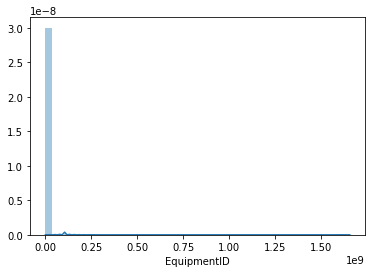

In [50]:
sns.distplot(df_fuelevents.EquipmentID)

In [51]:
#df_fueltrans['TRNUNTa'] = df_fueltrans['TRNUNT'].str.split()
df_fueltrans_a = df_fueltrans

In [52]:
df_fueltrans['TRUCK'] = df_fueltrans['TRNUNT'].str.extract(r'(\d+)')
#df_fueltrans[['TRUCK']] = df_fueltrans[['TRUCK']].apply(pd.to_numeric)

df_fueltrans.head(10)
df_fueltrans[['TRUCK']] = df_fueltrans[['TRUCK']].apply(pd.to_numeric)

/Users/smitaupadhyay/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


In [53]:
TRNUNT_counts = Counter(df_fueltrans.TRUCK).most_common()
TRNUNT_counts

[(2003.0, 581),
 (1847.0, 517),
 (1873.0, 482),
 (1957.0, 475),
 (308.0, 468),
 (1952.0, 454),
 (1830.0, 448),
 (1994.0, 445),
 (1814.0, 436),
 (1845.0, 424),
 (1968.0, 424),
 (1877.0, 421),
 (1932.0, 418),
 (1734.0, 416),
 (1868.0, 412),
 (1881.0, 410),
 (1728.0, 408),
 (1926.0, 406),
 (1925.0, 396),
 (2001.0, 394),
 (2053.0, 392),
 (1936.0, 388),
 (1755.0, 387),
 (1750.0, 387),
 (1836.0, 384),
 (1716.0, 383),
 (1772.0, 379),
 (1955.0, 374),
 (2002.0, 373),
 (1764.0, 373),
 (1762.0, 373),
 (1736.0, 370),
 (1995.0, 370),
 (1699.0, 370),
 (1883.0, 369),
 (1984.0, 369),
 (1686.0, 369),
 (1951.0, 369),
 (1793.0, 368),
 (1913.0, 368),
 (1853.0, 367),
 (1939.0, 366),
 (1758.0, 366),
 (1810.0, 365),
 (1860.0, 364),
 (2020.0, 364),
 (1985.0, 362),
 (1732.0, 361),
 (1824.0, 361),
 (1792.0, 359),
 (1941.0, 358),
 (1816.0, 357),
 (1730.0, 356),
 (1921.0, 355),
 (1915.0, 355),
 (1722.0, 352),
 (1717.0, 352),
 (1972.0, 352),
 (1821.0, 351),
 (1787.0, 351),
 (1929.0, 349),
 (1829.0, 349),
 (1726.0,

In [54]:
df_trans2003 = df_fueltrans[df_fueltrans.TRUCK == 2003] ##939 unique ID
df_trans2003.shape ##(581, 22)
df_trans2003.head(5)

,TRNID,TRNDAT,TRNTIM,TRNTS#,TRNTSN,TRNSTC,TRNST,TRNDRI,TRNUNT,TRNPI1,...,TRNPQ2,TRNPI3,TRNPQ3,TRNPI4,TRNPQ4,TRNPI5,TRNPQ5,TRNPI6,TRNPQ6,TRUCK
157,42636692,20170102,735,514498,TA ANTIOCH,ANTIOCH,TN,VAUJAM,2003,SCLE,...,0.00,,0.0,,0.0,,0.0,,0,2003.0
211,42653398,20170102,1143,516271,PILOT WHITE PINE 412,WHITE PINE,TN,VAUJAM,2003,ULSD,...,1.00,,0.0,,0.0,,0.0,,0,2003.0
637,42803619,20170103,1956,501638,TREXLER PLAZA,ALLENTOWN,PA,VAUJAM,2003,SCLE,...,0.00,,0.0,,0.0,,0.0,,0,2003.0
776,42855281,20170104,935,521524,PILOT TOMS BROOK 4642,TOMS BROOK,VA,VAUJAM,2003,ULSD,...,1.00,,0.0,,0.0,,0.0,,0,2003.0
1119,42963780,20170105,434,516016,PILOT MEBANE 057,MEBANE,NC,VAUJAM,2003,ULSD,...,8.46,,0.0,,0.0,,0.0,,0,2003.0


In [55]:
df_even2003 = df_fuelevents[df_fuelevents.EquipmentID == 2003]
df_even2003.head(5)

,Id,ESS_Id,EventTimeStamp,EquipmentID,MCTNumber,EquipmentType,DriverID,Latitude,Longitude,LocationTimeStamp,Speed,Heading,Odometer,IgnitionStatus,EFReportReason
187,12649293,13640468,2017-01-01 02:07:56.520,2003,105420339,tractor,VAUJAM,36.06636,-86.43462,2017-01-01 02:07:55.000,0,0.0,36831.9,2,0
189,12649295,13640472,2017-01-01 02:08:16.520,2003,105420339,tractor,VAUJAM,36.06634,-86.43461,2017-01-01 02:08:15.000,0,0.0,36831.9,2,1
1115,12650249,13641475,2017-01-01 08:00:27.503,2003,105420339,tractor,VAUJAM,36.06652,-86.43426,2017-01-01 08:00:26.000,3,35.7,36831.9,1,1
1116,12650250,13641476,2017-01-01 08:01:57.503,2003,105420339,tractor,VAUJAM,36.06673,-86.43422,2017-01-01 08:01:56.000,0,0.0,36831.9,2,1
1118,12650252,13641478,2017-01-01 08:02:27.503,2003,105420339,tractor,VAUJAM,36.06672,-86.43426,2017-01-01 08:02:26.000,0,0.0,36831.9,2,0


In [56]:
df_even2003.shape

(25750, 15)

In [57]:
df_even2003["DriverID"].unique() ##array(['VAUJAM', nan], dtype=object)
df_trans2003["TRNDRI"].unique() ##array(['VAUJAM'], dtype=object)

array(['VAUJAM'], dtype=object)

In [58]:
len(df_even2003["Longitude"].unique()) ##16914
len(df_even2003["Latitude"].unique()) ##16956

16956

In [59]:
df_QC = pd.read_csv("data/Extranet2.QCPerformanceExtracts 2.csv")
df_QC.shape

(32387, 32)

In [60]:
df_QC.head(10)

,Id,ESS_Id,EventTimeStamp,EquipmentID,MCTNumber,EquipmentType,DriverID,Driver2ID,Latitude,Longitude,...,ExcessSpeedTime,TotalFuelUsed,IdleFuelUsed,FaultFlag,RegisteredDriver,CruiseControlTime,TopGearTime,GearDataSource,SpeedUnits,SpeedMatrix
0,76818,13641356,2017-01-01 07:29:49.000,1995,105356577,tractor,LYNS,NaN,36.066249,-86.434814,...,0,0.3,0.3,0,0,0,0,3,MPH,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,..."
1,76819,13641357,2017-01-01 07:29:50.000,1995,105356577,tractor,LYNS,NaN,36.066249,-86.434814,...,0,239.7,21.2,0,1,49,1399,3,MPH,"301,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,..."
2,76820,13641432,2017-01-01 07:49:44.000,105420005,105420005,tractor,LOTG,NaN,36.195138,-83.174583,...,0,246.1,3.2,0,1,1014,1362,3,MPH,"62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0..."
3,76821,13643644,2017-01-01 13:58:17.000,1972,105363528,tractor,DINE,NaN,36.194444,-83.175185,...,0,0.2,0.1,0,0,0,0,3,MPH,"110,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,..."
4,76822,13643645,2017-01-01 13:58:18.000,1972,105363528,tractor,DINE,NaN,36.194444,-83.175185,...,0,202.1,1.5,1,1,12,1298,3,MPH,"112,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,..."
5,76823,13643777,2017-01-01 14:19:55.000,1985,105370056,tractor,GAME,NaN,35.013935,-89.894537,...,0,280.1,3.3,1,1,1158,1789,3,MPH,"22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0..."
6,76824,13644321,2017-01-01 16:00:28.000,1861,105339124,tractor,WYNF,NaN,35.588101,-86.444259,...,0,0.5,0.5,0,0,0,0,3,MPH,"20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0..."
7,76825,13644322,2017-01-01 16:00:29.000,1861,105339124,tractor,WYNF,NaN,35.588101,-86.444259,...,0,278.8,1.6,0,1,1323,1849,3,MPH,"11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0..."
8,76826,13644956,2017-01-01 18:09:40.000,1538,105392945,tractor,NaN,NaN,36.066712,-86.434722,...,0,0.0,0.0,0,0,0,0,0,MPH,"8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,..."
9,76827,13645006,2017-01-01 18:18:19.000,1777,105446111,tractor,MARLO,NaN,36.067175,-86.433564,...,0,0.5,0.5,0,0,0,0,3,MPH,"22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0..."


In [61]:
df_VAUJAM = df_QC[df_QC.DriverID == "VAUJAM"]
df_VAUJAM.shape

(53, 32)

In [62]:
df_VAUJAM_2003 = df_VAUJAM[df_VAUJAM.EquipmentID == 2003]
df_VAUJAM_2003.shape

(53, 32)

In [63]:
#df_VAUJAM_2003

/Users/smitaupadhyay/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


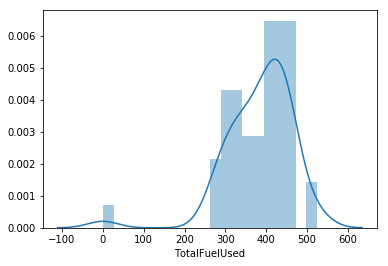

In [64]:
sns.distplot(df_VAUJAM_2003['TotalFuelUsed'], bins = 20)

/Users/smitaupadhyay/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


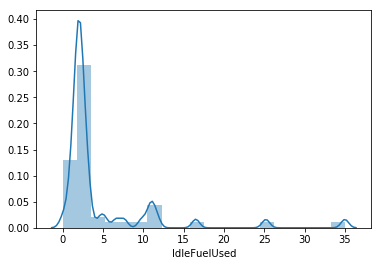

In [65]:
sns.distplot(df_VAUJAM_2003['IdleFuelUsed'], bins = 20)

/Users/smitaupadhyay/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


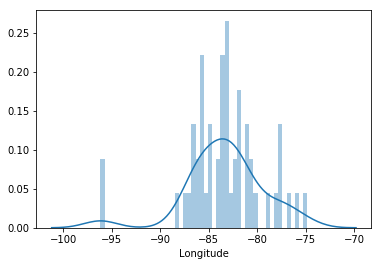

In [66]:
sns.distplot(df_VAUJAM_2003['Longitude'], bins = 50)

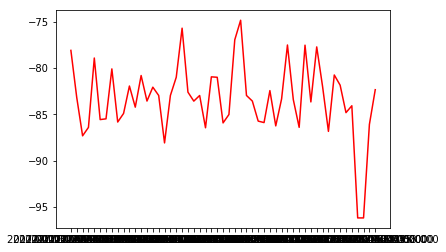

In [67]:
plt.plot_date(x=df_VAUJAM_2003.EventTimeStamp, y=df_VAUJAM_2003.Longitude, fmt="r-")
plt.show()

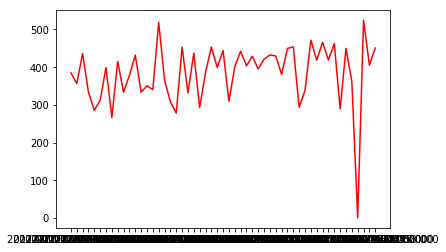

In [68]:
plt.plot_date(x=df_VAUJAM_2003.EventTimeStamp, y=df_VAUJAM_2003.TotalFuelUsed, fmt="r-")
plt.show()

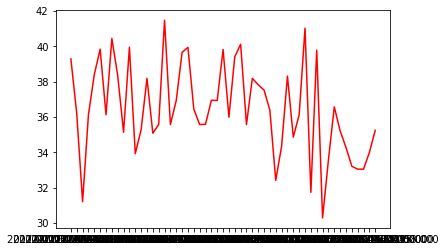

In [69]:
plt.plot_date(x=df_VAUJAM_2003.EventTimeStamp, y=df_VAUJAM_2003.Latitude, fmt="r-")
plt.show()

In [70]:
df_VAUJAM_2003.count()

Id                    53
ESS_Id                53
EventTimeStamp        53
EquipmentID           53
MCTNumber             53
EquipmentType         53
DriverID              53
Driver2ID              0
Latitude              53
Longitude             53
LocationTimeStamp     53
IgnitionStatus        53
TripStatus            53
DataStartTimeStamp    53
DataEndTimeStamp      53
Distance              53
DriveTime             53
EngineTime            53
MoveTime              53
IntertripIdleTime     53
ShortIdleTime         53
OverSpeedTime         53
ExcessSpeedTime       53
TotalFuelUsed         53
IdleFuelUsed          53
FaultFlag             53
RegisteredDriver      53
CruiseControlTime     53
TopGearTime           53
GearDataSource        53
SpeedUnits            53
SpeedMatrix           53
dtype: int64

In [71]:
#plt.plot_date(x=df_even2003.EventTimeStamp, y=df_even2003.Odometer, fmt="r-")
#plt.show()

In [72]:
df_fuelevents.head(5)

,Id,ESS_Id,EventTimeStamp,EquipmentID,MCTNumber,EquipmentType,DriverID,Latitude,Longitude,LocationTimeStamp,Speed,Heading,Odometer,IgnitionStatus,EFReportReason
0,12649083,13640241,2017-01-01 00:00:32.387,1992,105369677,tractor,BATK,30.34642,-81.70724,2017-01-01 00:00:30.000,0,0.0,39895.5,2,1
1,12649084,13640242,2017-01-01 00:01:24.867,1712,105437938,tractor,TAYANT,36.93953,-84.09541,2017-01-01 00:01:27.000,0,0.0,360378.8,1,2
2,12649092,13640251,2017-01-01 00:04:15.053,1713,105438293,tractor,RUSR,35.58664,-84.52786,2017-01-01 00:04:17.000,67,219.5,377577.4,1,2
3,12649102,13640261,2017-01-01 00:04:10.260,1585,105301976,tractor,MCAD,35.15430,-90.14263,2017-01-01 00:04:10.000,0,0.0,513931.8,1,2
4,12649103,13640272,2017-01-01 00:10:13.187,1564,105351785,tractor,ULAL,39.90268,-84.19254,2017-01-01 00:10:11.000,3,91.0,498691.0,1,2


In [73]:
df_events = df_fuelevents[['Id', 'EventTimeStamp', 'EquipmentID','DriverID', 'Latitude', 'Longitude','Speed', 
                           'Heading', 'Odometer', 'IgnitionStatus','EFReportReason']]
       
df_events.shape ##(8495130, 11)
len(df_events['Id'].unique()) ##8495130

8495130

In [74]:
df_levels = df_fuellevel[['TankId', 'TankLevelPercent', 'TankLevelGallons', 'ExactFuelEventId']]
df_levels.shape ##(7908828, 4)
len(df_levels['ExactFuelEventId'].unique()) ##7908824

7908824

In [75]:
df_fuelop.head()

,TRUCK,ACTIVE,SENDFUEL,SENDROUTE,TANKCAP,AVGMPG,SATTYPE
0,1,Y,Y,Y,200,6.0,
1,243,Y,Y,Y,200,6.0,
2,244,Y,Y,Y,200,6.0,
3,245,Y,Y,Y,200,6.0,
4,246,Y,Y,Y,200,6.0,


In [76]:
df_optmization = df_fuelop[['TRUCK', 'TANKCAP']]
df_optmization.shape ##(836, 2)

(836, 2)

In [77]:
df_fueltrans.head(2)

,TRNID,TRNDAT,TRNTIM,TRNTS#,TRNTSN,TRNSTC,TRNST,TRNDRI,TRNUNT,TRNPI1,...,TRNPQ2,TRNPI3,TRNPQ3,TRNPI4,TRNPQ4,TRNPI5,TRNPQ5,TRNPI6,TRNPQ6,TRUCK
0,42574765,20170101,20,520277,FLYING J VANDALIA 97,VANDALIA,OH,ULAL,1564,SCLE,...,0.00,,0.0,,0.0,,0.0,,0,1564.0
1,42575331,20170101,48,516202,PILOT NEW BRAUNFELS 330,NEW BRAUNFELS,TX,MANRI,1584,ULSD,...,7.71,CADV,1.0,,0.0,,0.0,,0,1584.0


In [78]:
len(df_fueltrans[df_fueltrans['TRNPI1'] == 'ULSD']) ##104006
len(df_fueltrans[df_fueltrans['TRNPI1'] == 'BDSL']) ##1
len(df_fueltrans[df_fueltrans['TRNPI1'] == 'CL']) ##6
len(df_fueltrans[df_fueltrans['TRNPI1'] == 'SCLE']) ##38256
len(df_fueltrans[df_fueltrans['TRNPI1'] == 'DEFD']) ##813
len(df_fueltrans[df_fueltrans['TRNPI1'] == 'CADV']) ##4305
df_fueltrans['TRNPI1'].unique() ##array(['SCLE', 'ULSD', 'CADV', 'DEFD', 'ADD ', 'OIL ', 'UREA', 'FUEL',
       ##'CDSL', 'DEFC', 'DSL1', 'BDSL'], dtype=object)
#df_fueltrans['TRNPI1'].count_values
len(df_fueltrans[df_fueltrans['TRNPI1'] == 'CDSL'])

6

In [79]:
df_fueltrans[['TRNPI1', 'TRNPI2', 'TRNPI3', 'TRNPI4', 'TRNPI5', 'TRNPI6']]

,TRNPI1,TRNPI2,TRNPI3,TRNPI4,TRNPI5,TRNPI6
0,SCLE,,,,,
1,ULSD,DEFD,CADV,,,
2,ULSD,DEFD,,,,
3,ULSD,,,,,
4,ULSD,,,,,
5,ULSD,,,,,
6,SCLE,,,,,
7,ULSD,DEFD,,,,
8,ULSD,,,,,
9,CADV,,,,,


In [80]:
df_fueltrans[['TRNPQ1', 'TRNPQ2', 'TRNPQ3', 'TRNPQ4', 'TRNPQ5', 'TRNPQ6']]

,TRNPQ1,TRNPQ2,TRNPQ3,TRNPQ4,TRNPQ5,TRNPQ6
0,1.00,0.00,0.0,0.0,0.0,0
1,137.40,7.71,1.0,0.0,0.0,0
2,137.93,4.12,0.0,0.0,0.0,0
3,45.00,0.00,0.0,0.0,0.0,0
4,107.36,0.00,0.0,0.0,0.0,0
5,93.88,0.00,0.0,0.0,0.0,0
6,1.00,0.00,0.0,0.0,0.0,0
7,136.29,5.50,0.0,0.0,0.0,0
8,149.04,0.00,0.0,0.0,0.0,0
9,1.00,0.00,0.0,0.0,0.0,0


In [81]:
df_transaction_all=df_fueltrans[['TRNID', 'TRNDAT', 'TRNTIM', 'TRNTS#','TRNDRI', 'TRNUNT', 'TRNPI1', 'TRNPQ1' ]]

In [82]:
df_station = df_fueltrans[['TRNTS#', 'TRNTSN', 'TRNSTC', 'TRNST']]

In [83]:
##drop rows not fuel
##This will drop all rows containing elements of your list
df_transaction= df_transaction_all[~df_transaction_all['TRNPI1'].isin(['SCLE', 'CADV', 'DEFD', 'ADD ', 'OIL ', 'UREA', 'DEFC'])] 


In [84]:
df_transaction_all['TRNPI1'].unique()

array(['SCLE', 'ULSD', 'CADV', 'DEFD', 'ADD ', 'OIL ', 'UREA', 'FUEL',
       'CDSL', 'DEFC', 'DSL1', 'BDSL'], dtype=object)

In [85]:
df_transaction['TRNPI1'].unique()

array(['ULSD', 'FUEL', 'CDSL', 'DSL1', 'BDSL'], dtype=object)

In [86]:
df_transaction_all.shape

(147861, 8)

In [87]:
df_transaction.shape

(104056, 8)

In [88]:
#df_events, df_levels, df_transaction, df_station, df_optimization
df_events["Speed"].unique()

array([  0,  67,   3,  53,  56,  10,  46,  63,   9,  57,  13,   2,  16,
         6,  48,  65,  66,  31,   8,  47,  64,   7,  69,  61,  59,  42,
         1,   4,  60,  14,  51,  17,  72,  12,  55,  58,  21,  26,  62,
        24,  33,   5,  38,  15,  41,  44,  11,  25,  30,  23,  27,  39,
        68,  54,  52,  18,  70,  19,  43,  71,  32,  34,  28,  45,  50,
        75,  35,  22,  36,  49,  37,  20,  40,  29,  73,  76,  74,  77,
        79,  81,  83,  84, 158,  82,  78,  80, 143,  88])

In [89]:
#df for all the speed less then 30
df_events_30=df_events[df_events['Speed'] <= 30]
df_events_30["Speed"].unique()

array([ 0,  3, 10,  9, 13,  2, 16,  6,  8,  7,  1,  4, 14, 17, 12, 21, 26,
       24,  5, 15, 11, 25, 30, 23, 27, 18, 19, 28, 22, 20, 29])

In [90]:
df_events_30.shape ##(6736518, 11)
df_events.shape ##(8495130, 11)

(8495130, 11)

In [91]:
df_events_30.count()

Id                6736518
EventTimeStamp    6736518
EquipmentID       6736518
DriverID          6419558
Latitude          6736518
Longitude         6736518
Speed             6736518
Heading           6736518
Odometer          6736518
IgnitionStatus    6736518
EFReportReason    6736518
dtype: int64

In [92]:
len(df_events_30['DriverID'].unique()) ##949
len(df_events_30['EquipmentID'].unique()) ##774
df_events_30['DriverID'].unique()

array(['BATK', 'TAYANT', 'MCAD', 'ULAL', 'FOSJA', 'THOCHA', 'JAML',
       'METMI', 'MANRI', 'SAND', 'AUSTE', 'DYET', 'TAYJON', 'WOOJA',
       'HARJI', nan, 'ARNMA', 'ANDR', 'DELK', 'RUSR', 'LOTG', 'MORJAR',
       'BLACH', 'HICWIL', 'CORWI', 'VAUJAM', 'DEPK', 'BEAJI', 'SIMJE',
       'EDWTI', 'HIGK', 'ELLTH', 'RODMAR', 'WHIGR', 'BEAKEV', 'MCLB',
       'MARJOH', 'LESJ', 'YOUW01', 'BOUB', 'GLAJ', 'WILTED', 'JARJ',
       'STEMI', 'WICJO', 'ROBMA', 'BOLJ', 'LUNR', 'MARCY', 'WHIJ01',
       'FORP', 'WEBP', 'STEGA', 'CANK', 'ECKS', 'HARWI', 'LONRO', 'SCHC',
       'CHRN', 'BARW', 'BRAMI', 'BUFDE', 'STED', 'SWET', 'DIVH', 'ALLMA',
       'TANDA', 'DONR', 'EDEMA', 'FORG', 'HARKEV', 'FAIC', 'FREDA',
       'CARGA', 'HARST', 'HOLS', 'CARJEF', 'LANA', 'MCGK', 'BROTI',
       'LEWMA', 'TAYB', 'SCOJA', 'ROBJEF', 'ROBAA', 'WEBTH', 'RUTP',
       'JOHTE', 'BINA', 'MURG', 'COFS', 'ANDJER', 'WILR04', 'SMIR01',
       'OWEJE', 'UHLS', 'NESD', 'PARE', 'COLMAR', 'TUSR', 'CUNW', 'CLAMI',
       'SMAD',

In [93]:
## merged with the ID and exactevent
df_event_level = pd.merge(df_events, df_levels, how='inner', left_on='Id', right_on = 'ExactFuelEventId')
df_event_level.head()

,Id,EventTimeStamp,EquipmentID,DriverID,Latitude,Longitude,Speed,Heading,Odometer,IgnitionStatus,EFReportReason,TankId,TankLevelPercent,TankLevelGallons,ExactFuelEventId
0,12649083,2017-01-01 00:00:32.387,1992,BATK,30.34642,-81.70724,0,0.0,39895.5,2,1,1,50.7,101.40,12649083
1,12649084,2017-01-01 00:01:24.867,1712,TAYANT,36.93953,-84.09541,0,0.0,360378.8,1,2,1,78.0,156.00,12649084
2,12649092,2017-01-01 00:04:15.053,1713,RUSR,35.58664,-84.52786,67,219.5,377577.4,1,2,1,31.7,63.40,12649092
3,12649102,2017-01-01 00:04:10.260,1585,MCAD,35.15430,-90.14263,0,0.0,513931.8,1,2,1,43.2,108.00,12649102
4,12649103,2017-01-01 00:10:13.187,1564,ULAL,39.90268,-84.19254,3,91.0,498691.0,1,2,1,50.3,125.75,12649103


In [94]:
df_event_level_optimization = pd.merge(df_event_level, df_optmization, how='inner', left_on='EquipmentID', right_on = 'TRUCK')
df_event_level_optimization.head()

,Id,EventTimeStamp,EquipmentID,DriverID,Latitude,Longitude,Speed,Heading,Odometer,IgnitionStatus,EFReportReason,TankId,TankLevelPercent,TankLevelGallons,ExactFuelEventId,TRUCK,TANKCAP
0,12649083,2017-01-01 00:00:32.387,1992,BATK,30.34642,-81.70724,0,0.0,39895.5,2,1,1,50.7,101.4,12649083,1992,200
1,12649107,2017-01-01 00:13:02.450,1992,BATK,30.34646,-81.70727,0,0.0,39895.5,1,0,1,52.0,104.0,12649107,1992,200
2,12649110,2017-01-01 00:15:52.450,1992,BATK,30.34605,-81.70736,0,0.0,39895.6,2,1,1,50.8,101.6,12649110,1992,200
3,12649116,2017-01-01 00:26:22.497,1992,BATK,30.34603,-81.70738,0,0.0,39895.6,1,0,1,53.2,106.4,12649116,1992,200
4,12649132,2017-01-01 00:41:22.560,1992,BATK,30.36038,-81.76080,63,359.3,39901.1,1,2,1,48.3,96.6,12649132,1992,200


In [95]:
df_events.shape ##(8495130, 11)
df_levels.shape ##(7908828, 4)
df_optmization.shape ##(836, 2)
df_event_level.shape ##(7908410, 15)
df_event_level_optimization.shape ##(7908410, 17)

(7908410, 17)

In [96]:
df_transaction.head()

,TRNID,TRNDAT,TRNTIM,TRNTS#,TRNDRI,TRNUNT,TRNPI1,TRNPQ1
1,42575331,20170101,48,516202,MANRI,1584,ULSD,137.40
2,42578678,20170101,134,516277,RUSR,1713,ULSD,137.93
3,42578722,20170101,137,231100,FOSJA,1711,ULSD,45.00
4,42579695,20170101,302,523050,HICWIL,1837,ULSD,107.36
5,42579752,20170101,307,519125,BATK,1992,ULSD,93.88


In [97]:
df_transaction['TRUCK'] = df_transaction['TRNUNT'].str.extract(r'(\d+)')
#df_fueltrans[['TRUCK']] = df_fueltrans[['TRUCK']].apply(pd.to_numeric)

df_transaction.head(10)
#df_transaction[['TRUCK']] = df_transaction[['TRUCK']].astype('int')

/Users/smitaupadhyay/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.
/Users/smitaupadhyay/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,TRNID,TRNDAT,TRNTIM,TRNTS#,TRNDRI,TRNUNT,TRNPI1,TRNPQ1,TRUCK
1,42575331,20170101,48,516202,MANRI,1584,ULSD,137.40,1584
2,42578678,20170101,134,516277,RUSR,1713,ULSD,137.93,1713
3,42578722,20170101,137,231100,FOSJA,1711,ULSD,45.00,1711
4,42579695,20170101,302,523050,HICWIL,1837,ULSD,107.36,1837
5,42579752,20170101,307,519125,BATK,1992,ULSD,93.88,1992
7,42580765,20170101,430,516304,MARJOH,1730,ULSD,136.29,1730
8,42580767,20170101,430,516156,JAML,1672,ULSD,149.04,1672
10,42580990,20170101,446,516113,BEAKEV,1739,ULSD,99.85,1739
11,42581101,20170101,453,516231,MCAD,1585,ULSD,131.69,1585
12,42581443,20170101,516,523050,JARJ,1930,ULSD,90.62,1930


In [98]:
#df_transaction['TRUCK'] = df_transaction[df_transaction['TRUCK'].notnull()]
#df_transaction[['TRUCK']] = df_transaction[['TRUCK']].astype('int')
#df_trans_trnotnull.shape()   #Counter(df_transaction['TRUCK'])

In [99]:
#df_event_level_optimization_trans = pd.merge(df_event_level_optimization, df_transaction, how='inner', left_on='TRUCK', right_on = 'TRUCK')
#df_event_level_optimization_trans.head()

In [100]:
null_columns=df_transaction.columns[df_transaction.isnull().any()]
df_transaction[null_columns].isnull().sum()

TRUCK    85
dtype: int64

In [101]:
df_tra = df_transaction.dropna()

In [102]:
df_transaction.shape ##(104056, 9)
df_tra.shape ##(103971, 9)
104056 - 103971

85

In [103]:
df_tra[['TRUCK']] = df_tra[['TRUCK']].astype('int')

/Users/smitaupadhyay/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:2540: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [104]:
#df_event_level_optimization_trans = pd.merge(df_event_level_optimization, df_tra, how='inner', left_on='TRUCK', right_on = 'TRUCK')
#df_event_level_optimization_trans.head()

In [105]:
df_tra.head()

,TRNID,TRNDAT,TRNTIM,TRNTS#,TRNDRI,TRNUNT,TRNPI1,TRNPQ1,TRUCK
1,42575331,20170101,48,516202,MANRI,1584,ULSD,137.40,1584
2,42578678,20170101,134,516277,RUSR,1713,ULSD,137.93,1713
3,42578722,20170101,137,231100,FOSJA,1711,ULSD,45.00,1711
4,42579695,20170101,302,523050,HICWIL,1837,ULSD,107.36,1837
5,42579752,20170101,307,519125,BATK,1992,ULSD,93.88,1992


In [106]:
df_tra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103971 entries, 1 to 147860
Data columns (total 9 columns):
TRNID     103971 non-null int64
TRNDAT    103971 non-null int64
TRNTIM    103971 non-null int64
TRNTS#    103971 non-null int64
TRNDRI    103971 non-null object
TRNUNT    103971 non-null object
TRNPI1    103971 non-null object
TRNPQ1    103971 non-null float64
TRUCK     103971 non-null int64
dtypes: float64(1), int64(5), object(3)
memory usage: 7.9+ MB


In [107]:
df_event_level_optimization.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7908410 entries, 0 to 7908409
Data columns (total 17 columns):
Id                  int64
EventTimeStamp      object
EquipmentID         int64
DriverID            object
Latitude            float64
Longitude           float64
Speed               int64
Heading             float64
Odometer            float64
IgnitionStatus      int64
EFReportReason      int64
TankId              int64
TankLevelPercent    float64
TankLevelGallons    float64
ExactFuelEventId    int64
TRUCK               int64
TANKCAP             int64
dtypes: float64(6), int64(9), object(2)
memory usage: 1.1+ GB


In [108]:
groupby_truck = df_event_level_optimization['Odometer'].groupby(df_event_level_optimization['TRUCK'])
groupby_truck.mean()

TRUCK
301     346999.411282
302     262806.078149
303     237584.812598
304     251090.056173
305     246501.191153
306     259627.232007
307     220778.923080
308     320138.219131
309     201612.026522
310     225014.069897
1508    575637.473333
1513    529269.894667
1516       593.100000
1519       481.600000
1520    580040.295091
1521    597975.812698
1524    504734.842187
1525    554562.872970
1526    584408.358482
1527    614199.505863
1528    602346.555645
1529    538456.215664
1530    559095.160483
1531    468523.014093
1534    489658.413655
1535    592027.060011
1537    557411.809984
1539    576916.784323
1543    531012.292686
1547    555461.814523
            ...      
2124      9891.826568
2125     14277.778374
2126     12413.732291
2127     15608.322066
2128     14553.171308
2129     11758.965995
2130     19483.217458
2131     16783.042324
2133     22866.567803
2134     13600.392615
2135     23011.045546
2136     16910.609211
2137     14712.195119
2138     21794.503771
2139

In [109]:
df_event_level_optimization['Odometer'].groupby(df_event_level_optimization['TRUCK']).describe()

,count,mean,std,min,25%,50%,75%,max
TRUCK,,,,,,,,
301,1108.0,346999.411282,2706.557141,342355.5,344711.900,346907.70,349364.650,352014.6
302,13853.0,262806.078149,10556.149437,244162.7,253636.000,263539.20,271618.000,281027.2
303,1659.0,237584.812598,3361.273334,232028.6,234668.900,237388.00,240513.000,243508.7
304,15924.0,251090.056173,38490.899168,181312.8,217643.350,253307.25,287791.875,306788.3
305,13056.0,246501.191153,10689.040249,227952.9,237105.600,246953.85,255941.200,264257.9
306,15378.0,259627.232007,14138.282708,234021.3,247491.125,260505.90,271525.800,284361.0
307,18765.0,220778.923080,40597.820470,150530.6,186383.600,220504.20,255581.500,292574.8
308,12388.0,320138.219131,39387.969690,253439.1,286672.100,318316.50,354706.800,389428.4
309,17314.0,201612.026522,15621.338783,0.0,188588.200,202252.65,214252.425,229102.4


In [110]:
df_tra_1513=df_tra[df_tra['TRUCK'] == 1513]
df_tra_1513.head()

,TRNID,TRNDAT,TRNTIM,TRNTS#,TRNDRI,TRNUNT,TRNPI1,TRNPQ1,TRUCK
72,42598121,20170101,1211,516194,BAIJO,1513,ULSD,50.02,1513


In [111]:
df_tra_301=df_tra[df_tra['TRUCK'] == 301]
df_tra_301.shape
df_tra_301['TRNDRI'].unique()

array(['MOODO ', 'FERDE ', 'DELST '], dtype=object)

/Users/smitaupadhyay/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1859: RuntimeWarning: invalid value encountered in double_scalars
  loval = q1 - whis * stats['iqr']
/Users/smitaupadhyay/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1860: RuntimeWarning: invalid value encountered in double_scalars
  hival = q3 + whis * stats['iqr']


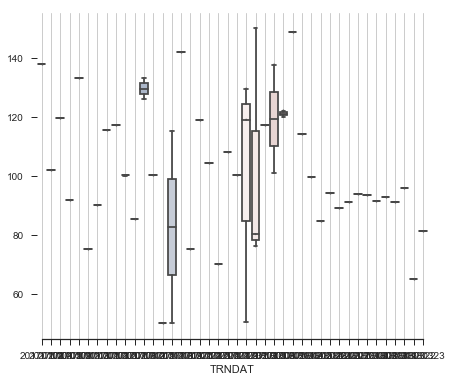

In [112]:
sns.set(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))
#ax.set_xscale("log")

# Load the example planets dataset
#planets = sns.load_dataset("planets")

# Plot the orbital period with horizontal boxes
sns.boxplot(y="TRNPQ1", x="TRNDAT", data=df_tra_301,
            whis=np.inf, palette="vlag")

# Add in points to show each observation
sns.swarmplot(x="TRNDAT", y="TRNPQ1", data=df_tra_301,
              size=2, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

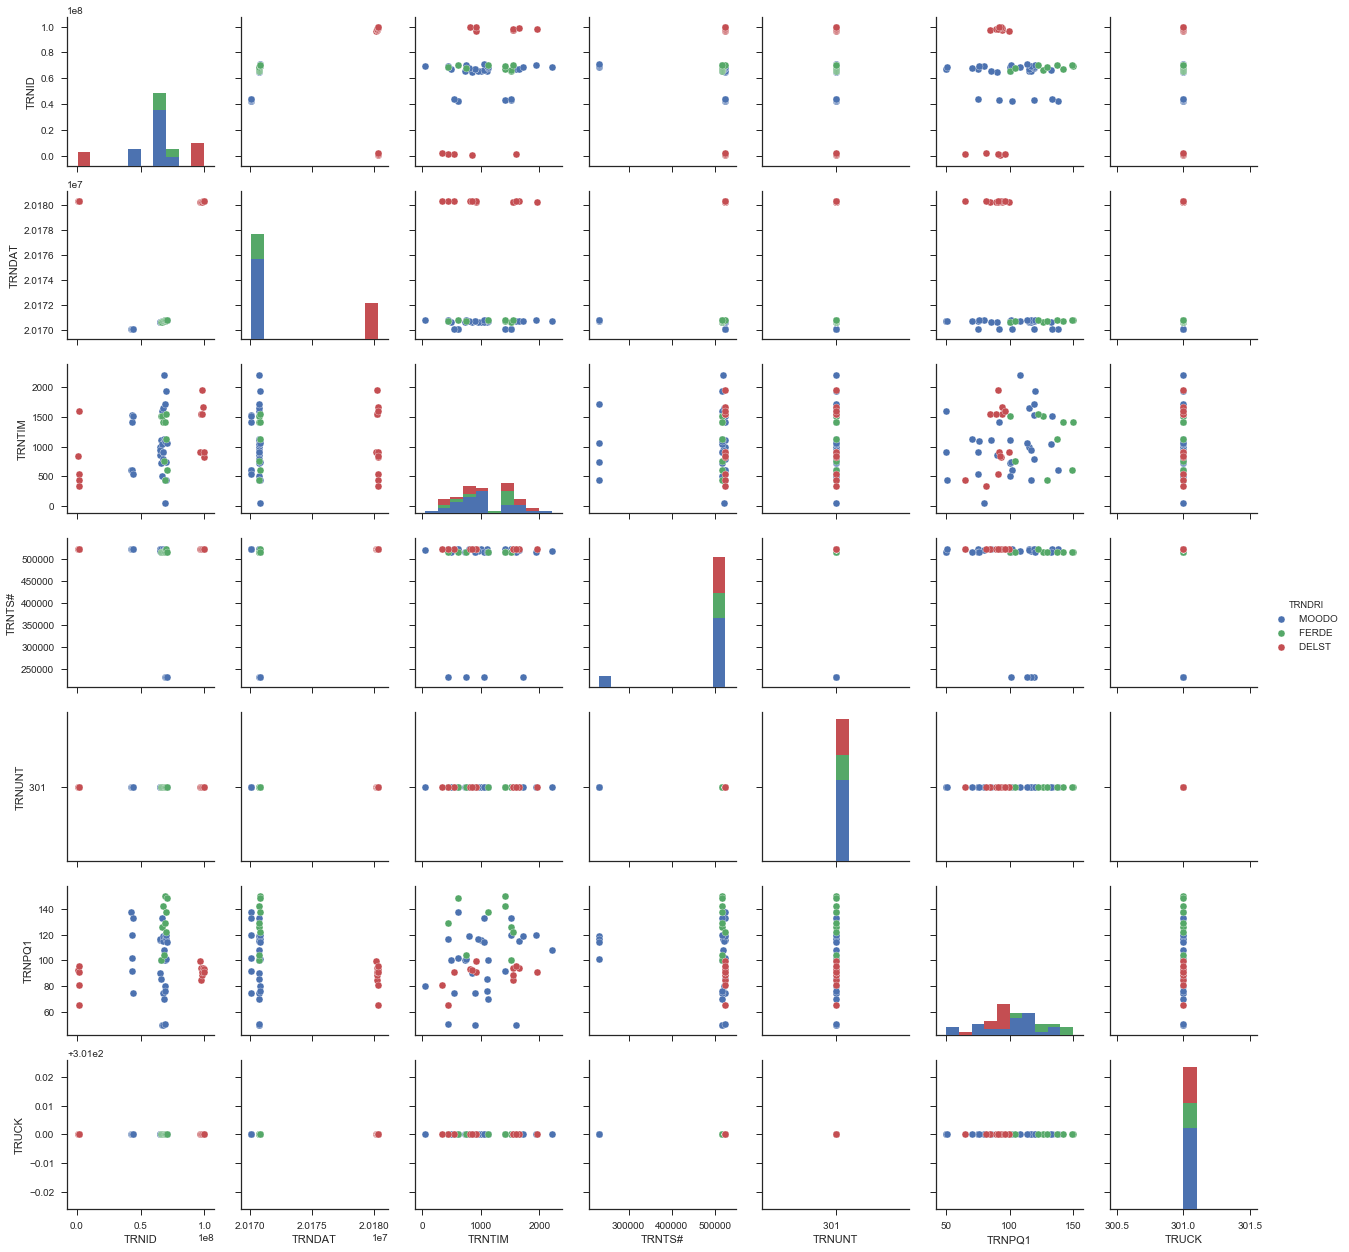

In [113]:
import seaborn as sns
sns.set(style="ticks")

#df = sns.load_dataset("iris")
sns.pairplot(df_tra_301, hue="TRNDRI")

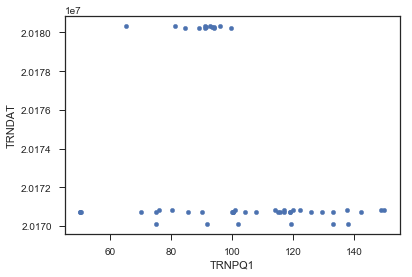

In [114]:
df_tra_301.plot.scatter(y="TRNDAT", x="TRNPQ1")

In [115]:
len(df_tra_301["TRNDAT"].unique())

42

In [116]:
df_event_level_optimization.columns

Index(['Id', 'EventTimeStamp', 'EquipmentID', 'DriverID', 'Latitude',
       'Longitude', 'Speed', 'Heading', 'Odometer', 'IgnitionStatus',
       'EFReportReason', 'TankId', 'TankLevelPercent', 'TankLevelGallons',
       'ExactFuelEventId', 'TRUCK', 'TANKCAP'],
      dtype='object')

In [117]:
df_event_level_optimization['DriverID'].unique()

array(['BATK', nan, 'SHOP1', 'AMAD', 'ENSJ', 'TAYANT', 'STEDEN', 'STAH',
       'PITK', 'RUSR', 'GALH', 'GODJO', 'GOOJO', 'MCAD', 'WILD04',
       'BARAL', 'HOLC', 'HEDD', 'NOEL', 'ULAL', 'PERT', 'QUID', 'HOWK',
       'HILB', 'RAYMI', 'ELLTH', 'FARMI', 'PASD', 'FOSJA', 'SMIMIC',
       'RICM', 'HOLW1', 'DARJ', 'THOCHA', 'CARDE', 'WILREN', 'RODMAR',
       'MANRI', 'REYM', 'EVAJO', 'TYLA', 'DAVCL', 'NIXD', 'JAML', 'HILF',
       'GLADO', 'MARMIS', 'RANST', 'METMI', 'SAND', 'GRES', 'GRIMAR',
       'MCDS', 'SIZD', 'LANWA', 'STAW', 'AUSTE', 'ESTD', 'CORWIL',
       'MORJAR', 'WRIJON', 'JAMJA', 'MCCMIK', 'MARJOH', 'SHOP3', 'DYET',
       'TAYJON', 'HAYA', 'ROBBE', 'RAMRI', 'BARW', 'ANDR', 'CHASTE',
       'RICJ01', 'BULR', 'SHOP2', 'DELK', 'LACJO', 'PARDON', 'LOTG',
       'SIMR', 'WILB01', 'JACTE', 'JACGR', 'KERK', 'STEMIC', 'KIRK',
       'PRAR', 'SANJON', 'PRUH', 'POUD', 'BLACH', 'BYASH', 'HICWIL',
       'SHATH', 'MCGK', 'THOJEF', 'THOK', 'CORWI', 'HUGC', 'VAUJAM',
       'DEPK', 'JEA

In [118]:
def to_datetime(date, time):
   day = date % 100
   date = date // 100
   month = date % 100
   year = date // 100

   minutes = time % 100
   time = time // 100
   hours = time % 100
   
   return pd.to_datetime(
       f"{year}-{month:02d}-{day:02d} {hours:02d}:{minutes:02d}",
       yearfirst = True)

fuel_transactions['datetime'] = fuel_transactions.apply(
   lambda row: to_datetime(row.date, row.time), axis=1)

NameError: name 'fuel_transactions' is not defined

In [119]:
df_event_level_optimization.head(2)

,Id,EventTimeStamp,EquipmentID,DriverID,Latitude,Longitude,Speed,Heading,Odometer,IgnitionStatus,EFReportReason,TankId,TankLevelPercent,TankLevelGallons,ExactFuelEventId,TRUCK,TANKCAP
0,12649083,2017-01-01 00:00:32.387,1992,BATK,30.34642,-81.70724,0,0.0,39895.5,2,1,1,50.7,101.4,12649083,1992,200
1,12649107,2017-01-01 00:13:02.450,1992,BATK,30.34646,-81.70727,0,0.0,39895.5,1,0,1,52.0,104.0,12649107,1992,200


In [120]:
df0 = df_event_level_optimization[df_event_level_optimization['Speed'] == 0]

In [121]:
df0.shape

(4824961, 17)

In [122]:
len(df0['DriverID'].unique())

925

In [123]:
Counter(df0.DriverID).most_common()

[(nan, 100261),
 ('DYET', 27723),
 ('ULAL', 18649),
 ('SIMJIM', 18434),
 ('VAUJAM', 17453),
 ('ECKS', 17420),
 ('NARJ', 16704),
 ('BULR', 15768),
 ('CHAJO', 15092),
 ('BROD03', 14311),
 ('PERT', 13915),
 ('ANTR', 13860),
 ('FARMI', 13760),
 ('EDWTI', 13706),
 ('SWEJ', 13686),
 ('MORJAM', 13629),
 ('STEGA', 13511),
 ('CUNW', 13402),
 ('CULD', 13356),
 ('RIFJ', 13218),
 ('CHAAN', 13086),
 ('DEED', 13084),
 ('CRES', 13079),
 ('CHRN', 13029),
 ('HAWHEN', 12824),
 ('SAVE', 12705),
 ('TAYJON', 12701),
 ('NORPA', 12670),
 ('DAWDA', 12668),
 ('LASR', 12371),
 ('LONRO', 12358),
 ('PRUH', 12318),
 ('WIET', 12305),
 ('DINE', 12256),
 ('GALJU', 12162),
 ('CAID', 12123),
 ('BALD', 12066),
 ('BYRCHR', 11925),
 ('DEPK', 11911),
 ('CULJA', 11904),
 ('SIMJE', 11898),
 ('BUFB', 11866),
 ('RUTP', 11865),
 ('CAIB', 11837),
 ('JORJO', 11798),
 ('FERCA', 11638),
 ('MANDA', 11631),
 ('MARJOH', 11619),
 ('SHIJO', 11536),
 ('PITH', 11534),
 ('BOLJO', 11475),
 ('AMAD', 11450),
 ('SUTD', 11444),
 ('AUSTE', 11413

In [124]:
df0arpp = df0[df0['DriverID'] == 'ARPP']

In [125]:
df0arpp.shape ##(1078, 17)
df0arpp.EquipmentID.unique() ##array([1844])
len(df0arpp.EventTimeStamp.unique())

1069

In [126]:
df0arpp.head(20)

,Id,EventTimeStamp,EquipmentID,DriverID,Latitude,Longitude,Speed,Heading,Odometer,IgnitionStatus,EFReportReason,TankId,TankLevelPercent,TankLevelGallons,ExactFuelEventId,TRUCK,TANKCAP
6130950,13209012,2017-01-31 16:35:49.097,1844,ARPP,36.06690,-86.43353,0,139.5,122150.8,2,1,1,82.1,164.2,13209012,1844,200
6130951,13209668,2017-01-31 17:07:29.280,1844,ARPP,36.06692,-86.43353,0,139.5,122150.8,1,1,1,73.3,146.6,13209668,1844,200
6130952,13209717,2017-01-31 17:09:39.280,1844,ARPP,36.06738,-86.43445,0,283.8,122150.9,1,0,1,72.4,144.8,13209717,1844,200
6130953,13209833,2017-01-31 17:15:29.280,1844,ARPP,36.06746,-86.43493,0,276.6,122150.9,2,1,1,72.5,145.0,13209833,1844,200
6130957,13211485,2017-01-31 18:55:20.017,1844,ARPP,36.94279,-86.48133,0,324.3,122247.5,1,2,1,65.1,130.2,13211485,1844,200
6130958,13211651,2017-01-31 19:01:30.030,1844,ARPP,36.93609,-86.50735,0,270.8,122249.6,2,1,1,65.2,130.4,13211651,1844,200
6130960,13211942,2017-01-31 19:25:30.267,1844,ARPP,36.93150,-86.51504,0,169.9,122250.6,1,2,1,65.3,130.6,13211942,1844,200
6130961,13211966,2017-01-31 19:28:30.280,1844,ARPP,36.93159,-86.51506,0,357.0,122250.6,2,1,1,65.2,130.4,13211966,1844,200
6130963,13212052,2017-01-31 19:35:40.297,1844,ARPP,36.93250,-86.51297,0,336.7,122250.8,2,1,1,65.4,130.8,13212052,1844,200
6130964,13212083,2017-01-31 19:37:20.297,1844,ARPP,36.93250,-86.51297,0,336.7,122250.8,2,0,1,65.4,130.8,13212083,1844,200


In [127]:
import datetime 
#df0arpp['EventTimeStamp'] = pd.datetime(df0arpp['EventTimeStamp'], infer_datetime_format = True)
#df0arpp['Day'] = df0arpp['EventTimeStamp'].apply(lambda x: dt.datetime.strftime(x, '%Y-%m-%d'))


In [128]:
df0arpp['Date'] = pd.to_datetime(df0arpp['EventTimeStamp'])

/Users/smitaupadhyay/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [129]:
type(df0arpp.loc[6130950, 'Date'])
# df0arpp.head(2)

pandas._libs.tslib.Timestamp

In [130]:
df0arpp['Day'] = df0arpp['Date'].apply(lambda x: datetime.datetime.strftime(x, '%Y-%m-%d'))

/Users/smitaupadhyay/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [131]:
df0arpp.head(5)

,Id,EventTimeStamp,EquipmentID,DriverID,Latitude,Longitude,Speed,Heading,Odometer,IgnitionStatus,EFReportReason,TankId,TankLevelPercent,TankLevelGallons,ExactFuelEventId,TRUCK,TANKCAP,Date,Day
6130950,13209012,2017-01-31 16:35:49.097,1844,ARPP,36.06690,-86.43353,0,139.5,122150.8,2,1,1,82.1,164.2,13209012,1844,200,2017-01-31 16:35:49.097,2017-01-31
6130951,13209668,2017-01-31 17:07:29.280,1844,ARPP,36.06692,-86.43353,0,139.5,122150.8,1,1,1,73.3,146.6,13209668,1844,200,2017-01-31 17:07:29.280,2017-01-31
6130952,13209717,2017-01-31 17:09:39.280,1844,ARPP,36.06738,-86.43445,0,283.8,122150.9,1,0,1,72.4,144.8,13209717,1844,200,2017-01-31 17:09:39.280,2017-01-31
6130953,13209833,2017-01-31 17:15:29.280,1844,ARPP,36.06746,-86.43493,0,276.6,122150.9,2,1,1,72.5,145.0,13209833,1844,200,2017-01-31 17:15:29.280,2017-01-31
6130957,13211485,2017-01-31 18:55:20.017,1844,ARPP,36.94279,-86.48133,0,324.3,122247.5,1,2,1,65.1,130.2,13211485,1844,200,2017-01-31 18:55:20.017,2017-01-31


In [137]:
df0arppsort = df0arpp['EventTimeStamp'].sort_values()
# df.sort_values('colname')

In [132]:
len(df0arpp.Day.unique())

36

In [133]:
df0arpp.describe()

,Id,EquipmentID,Latitude,Longitude,Speed,Heading,Odometer,IgnitionStatus,EFReportReason,TankId,TankLevelPercent,TankLevelGallons,ExactFuelEventId,TRUCK,TANKCAP
count,1.078000e+03,1078.0,1078.000000,1078.000000,1078.0,1078.000000,1078.000000,1078.000000,1078.000000,1078.0,1078.000000,1078.000000,1.078000e+03,1078.0,1078.0
mean,1.361661e+07,1844.0,37.330797,-84.507368,0.0,154.284137,131559.237384,1.475881,1.170686,1.0,77.544063,155.088126,1.361661e+07,1844.0,200.0
std,2.042830e+05,0.0,2.364856,4.487533,0.0,123.233423,4434.076911,0.499650,0.770024,0.0,22.979327,45.958653,2.042830e+05,0.0,0.0
min,1.320901e+07,1844.0,29.715930,-97.151110,0.0,0.000000,122150.800000,1.000000,0.000000,1.0,21.100000,42.200000,1.320901e+07,1844.0,200.0
25%,1.346202e+07,1844.0,35.737945,-86.524808,0.0,26.300000,128296.650000,1.000000,1.000000,1.0,60.000000,120.000000,1.346202e+07,1844.0,200.0
50%,1.364543e+07,1844.0,36.932500,-85.873580,0.0,148.600000,132825.700000,1.000000,1.000000,1.0,82.200000,164.400000,1.364543e+07,1844.0,200.0
75%,1.381260e+07,1844.0,39.339720,-81.937520,0.0,275.700000,135356.400000,2.000000,2.000000,1.0,100.000000,200.000000,1.381260e+07,1844.0,200.0
max,1.389453e+07,1844.0,41.904020,-74.329580,0.0,359.800000,137323.100000,2.000000,2.000000,1.0,100.000000,200.000000,1.389453e+07,1844.0,200.0


In [ ]:
# csv to .pkl format
# df[cl].str.stp()
# df[col]..astype('str')
# df.group_by(['DriverID', 'TRUCK'])
# .shfit()  function 
# sns.swarmplot
#     fg = sns.FacetGrid(data=, hue=,col=)
# fg.map
# sns.lmplot
# >>> g = sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips,
# ...                markers=["o", "x"])


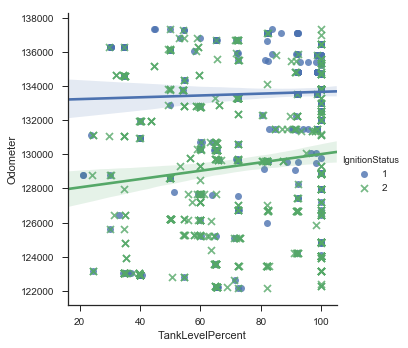

In [135]:
g = sns.lmplot(x="TankLevelPercent", y="Odometer", hue="IgnitionStatus", data=df0arpp,
               markers=["o", "x"])               
